# 정부의 거리두기 단계에 따른 방역 효과 분석
#### 참고한 데이터 자료
- https://data.seoul.go.kr/dataList/OA-20470/S/1/datasetView.do

## Step 1. 기본 라이브러리 로드

In [1]:
import pandas as pd                  # 데이터 포인트 제작 담당
import matplotlib.pylab as plt       # 데이터 시각화 담당 
import numpy as np                   # 연산 처리 담당
import matplotlib.ticker as ticker   # 그래프 숫자 눈금 설정 담당
import matplotlib
%matplotlib inline

## Step 2. 서울시 코로나 확진자 수 발생동향 CSV 읽어오기

In [3]:
# 코로나 데이터 (2020년 2월 5일 ~ 2022년 1월 10일)
df_origin = pd.read_csv("data/corona_seoul.csv")
df_origin

,자치구 기준일,종로구 전체,종로구 추가,중구 전체,중구 추가,용산구 전체,용산구 추가,성동구 전체,성동구 추가,광진구 전체,...,서초구 전체,서추구 추가,강남구 전체,강남구 추가,송파구 전체,송파구 추가,강동구 전체,강동구 추가,기타 전체,기타 추가
0,2022.01.10.00,4158,15,3880,22,5570,24,5998,21,7404,...,8753,33,13121,48,14322,55,9741,32,17617,65
1,2022.01.09.00,4144,20,3863,17,5547,32,5977,17,7375,...,8720,40,13072,49,14267,68,9709,48,17547,91
2,2022.01.08.00,4124,28,3846,16,5515,24,5960,30,7342,...,8680,41,13023,68,14199,49,9661,43,17456,61
3,2022.01.07.00,4096,24,3830,23,5491,36,5930,30,7301,...,8639,49,12955,74,14150,61,9618,40,17396,92
4,2022.01.06.00,4072,16,3807,23,5455,28,5900,33,7267,...,8590,47,12881,76,14089,76,9578,57,17304,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,20.02.09.10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
703,20.02.08.10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
704,20.02.07.10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
705,20.02.06.10,3,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,2,1


## Step 3. 서울시 코로나 확진자 수 발생 동향 CSV 전처리

### 3.1 지역, 날짜  별 '전체' 확진자 수 

In [4]:
# 지역 별 전체 누적 확진자 수를 지시하는 열 추출
# 맨 마지막 column인 '기타 전체' 열 제거
df_entire = df_origin.filter(regex='전체').drop(columns=['기타 전체'], axis=1)
df_entire

,종로구 전체,중구 전체,용산구 전체,성동구 전체,광진구 전체,동대문구 전체,중랑구 전체,성북구 전체,강북구 전체,도봉구 전체,...,강서구 전체,구로구 전체,금천구 전체,영등포구 전체,동작구 전체,관악구 전체,서초구 전체,강남구 전체,송파구 전체,강동구 전체
0,4158,3880,5570,5998,7404,9848,8933,9923,6990,7053,...,10855,11166,6073,10895,9116,11730,8753,13121,14322,9741
1,4144,3863,5547,5977,7375,9805,8906,9883,6973,7034,...,10822,11121,6052,10882,9092,11694,8720,13072,14267,9709
2,4124,3846,5515,5960,7342,9759,8873,9856,6946,7010,...,10793,11069,6028,10849,9066,11653,8680,13023,14199,9661
3,4096,3830,5491,5930,7301,9720,8832,9815,6925,6968,...,10741,11023,6003,10824,9032,11601,8639,12955,14150,9618
4,4072,3807,5455,5900,7267,9684,8796,9776,6907,6937,...,10713,10972,5983,10777,8988,11559,8590,12881,14089,9578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
703,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
704,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
705,3,0,0,0,0,0,1,2,0,0,...,1,0,0,0,0,0,0,0,1,0


In [5]:
# df_entire('전체' 열만 있는 데이터프레임)의 모든 열 추출
df_entire.columns

Index(['종로구 전체', '중구 전체', '용산구 전체', '성동구 전체', '광진구 전체', '동대문구 전체', '중랑구 전체',
       '성북구 전체', '강북구 전체', '도봉구 전체', '노원구 전체', '은평구 전체', '서대문구 전체', '마포구 전체',
       '양천구 전체', '강서구 전체', '구로구 전체', '금천구 전체', '영등포구 전체', '동작구 전체', '관악구 전체',
       '서초구 전체', '강남구 전체', '송파구 전체', '강동구 전체'],
      dtype='object')

In [15]:
# df_entire의 column 순서 변경
# '자치구 기준일'을 맨 앞으로 이동
col_mind = ['자치구 기준일', '종로구 전체', '중구 전체', '용산구 전체', '성동구 전체', '광진구 전체', '동대문구 전체', '중랑구 전체',
       '성북구 전체', '강북구 전체', '도봉구 전체', '노원구 전체', '은평구 전체', '서대문구 전체', '마포구 전체',
       '양천구 전체', '강서구 전체', '구로구 전체', '금천구 전체', '영등포구 전체', '동작구 전체', '관악구 전체',
       '서초구 전체', '강남구 전체', '송파구 전체', '강동구 전체']
df_entire['자치구 기준일'] = df_origin['자치구 기준일']
df_entire_final = df_entire[col_mind]
df_entire_final

,자치구 기준일,종로구 전체,중구 전체,용산구 전체,성동구 전체,광진구 전체,동대문구 전체,중랑구 전체,성북구 전체,강북구 전체,...,강서구 전체,구로구 전체,금천구 전체,영등포구 전체,동작구 전체,관악구 전체,서초구 전체,강남구 전체,송파구 전체,강동구 전체
0,2022.01.10.00,4158,3880,5570,5998,7404,9848,8933,9923,6990,...,10855,11166,6073,10895,9116,11730,8753,13121,14322,9741
1,2022.01.09.00,4144,3863,5547,5977,7375,9805,8906,9883,6973,...,10822,11121,6052,10882,9092,11694,8720,13072,14267,9709
2,2022.01.08.00,4124,3846,5515,5960,7342,9759,8873,9856,6946,...,10793,11069,6028,10849,9066,11653,8680,13023,14199,9661
3,2022.01.07.00,4096,3830,5491,5930,7301,9720,8832,9815,6925,...,10741,11023,6003,10824,9032,11601,8639,12955,14150,9618
4,2022.01.06.00,4072,3807,5455,5900,7267,9684,8796,9776,6907,...,10713,10972,5983,10777,8988,11559,8590,12881,14089,9578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,20.02.09.10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
703,20.02.08.10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
704,20.02.07.10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
705,20.02.06.10,3,0,0,0,0,0,1,2,0,...,1,0,0,0,0,0,0,0,1,0


In [24]:
# df_entire_final) 행, 열 크기
df_entire_final.shape

(707, 26)

In [25]:
# df_entire_final) 수치형 변수의 분포 확인
df_entire_final.describe()

,종로구 전체,중구 전체,용산구 전체,성동구 전체,광진구 전체,동대문구 전체,중랑구 전체,성북구 전체,강북구 전체,도봉구 전체,...,강서구 전체,구로구 전체,금천구 전체,영등포구 전체,동작구 전체,관악구 전체,서초구 전체,강남구 전체,송파구 전체,강동구 전체
count,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,...,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000
mean,731.760962,676.205092,1093.311174,1133.596888,1337.339463,1573.115983,1629.683168,1720.145686,1159.995757,1210.069307,...,2009.004243,1766.589816,891.418670,1813.318246,1718.035361,2167.599717,1707.646393,2548.123055,2534.097595,1632.872702
std,953.199595,921.719485,1364.393191,1450.286368,1783.527644,2189.163720,2049.482282,2220.247301,1571.918089,1547.936639,...,2460.752648,2609.725583,1369.393785,2569.957322,2170.981172,2800.556866,2112.224793,3323.029507,3337.344044,2228.788465
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,20.000000,54.000000,57.000000,22.000000,44.000000,44.000000,42.000000,28.000000,64.000000,...,102.500000,91.000000,39.000000,70.000000,70.000000,143.000000,62.000000,97.500000,98.500000,48.500000
50%,493.000000,324.000000,495.000000,558.000000,563.000000,792.000000,965.000000,968.000000,594.000000,696.000000,...,1513.000000,762.000000,385.000000,842.000000,979.000000,1131.000000,934.000000,1104.000000,1318.000000,724.000000
75%,931.000000,851.000000,1693.500000,1740.000000,1930.000000,2059.000000,2372.000000,2342.000000,1621.500000,1735.000000,...,2734.000000,1902.500000,975.500000,2228.500000,2364.500000,2796.000000,2623.000000,4054.500000,3486.500000,2254.500000
max,4158.000000,3880.000000,5570.000000,5998.000000,7404.000000,9848.000000,8933.000000,9923.000000,6990.000000,7053.000000,...,10855.000000,11166.000000,6073.000000,10895.000000,9116.000000,11730.000000,8753.000000,13121.000000,14322.000000,9741.000000


### 3.2 지역, 날짜  별 '추가' 확진자 수 

In [26]:
# 지역 별 추가 확진자 수를 지시하는 열 추출
# 맨 마지막 column인 '기타 전체' 열 제거
df_plus = df_origin.filter(regex='추가').drop(columns=['기타 추가'], axis=1)
df_plus

,종로구 추가,중구 추가,용산구 추가,성동구 추가,광진구 추가,동대문구 추가,중랑구 추가,성북구 추가,강북구 추가,도봉구 추가,...,강서구 추가,구로구 추가,금천구 추가,영등포구 추가,동작구 추가,관악구 추가,서추구 추가,강남구 추가,송파구 추가,강동구 추가
0,15,22,24,21,29,43,27,40,17,20,...,33,46,21,13,24,36,33,48,55,32
1,20,17,32,17,33,46,33,27,27,24,...,29,52,24,33,26,41,40,49,68,48
2,28,16,24,30,41,39,41,41,21,42,...,52,46,25,26,34,52,41,68,49,43
3,24,23,36,30,34,36,36,39,18,31,...,28,51,20,47,44,42,49,74,61,40
4,16,23,28,33,51,54,57,39,30,32,...,48,61,30,58,32,57,47,76,76,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
703,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
704,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
705,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# df_plus('추가' 열만 있는 데이터프레임)의 모든 열 추출
df_plus.columns

Index(['종로구 추가', '중구 추가', '용산구 추가', '성동구 추가', '광진구 추가', '동대문구 추가', '중랑구 추가',
       '성북구 추가', '강북구 추가', '도봉구 추가', '노원구 추가', '은평구 추가', '서대문구 추가', '마포구 추가',
       '양천구 추가', '강서구 추가', '구로구 추가', '금천구 추가', '영등포구 추가', '동작구 추가', '관악구 추가',
       '서추구 추가', '강남구 추가', '송파구 추가', '강동구 추가'],
      dtype='object')

In [28]:
# df_plus의 column 순서 변경
# '자치구 기준일'을 맨 앞으로 이동
col_mind = ['자치구 기준일', '종로구 추가', '중구 추가', '용산구 추가', '성동구 추가', '광진구 추가', '동대문구 추가', '중랑구 추가',
       '성북구 추가', '강북구 추가', '도봉구 추가', '노원구 추가', '은평구 추가', '서대문구 추가', '마포구 추가',
       '양천구 추가', '강서구 추가', '구로구 추가', '금천구 추가', '영등포구 추가', '동작구 추가', '관악구 추가',
       '서추구 추가', '강남구 추가', '송파구 추가', '강동구 추가']
df_plus['자치구 기준일'] = df_origin['자치구 기준일']
df_plus_final = df_plus[col_mind]
df_plus_final

,자치구 기준일,종로구 추가,중구 추가,용산구 추가,성동구 추가,광진구 추가,동대문구 추가,중랑구 추가,성북구 추가,강북구 추가,...,강서구 추가,구로구 추가,금천구 추가,영등포구 추가,동작구 추가,관악구 추가,서추구 추가,강남구 추가,송파구 추가,강동구 추가
0,2022.01.10.00,15,22,24,21,29,43,27,40,17,...,33,46,21,13,24,36,33,48,55,32
1,2022.01.09.00,20,17,32,17,33,46,33,27,27,...,29,52,24,33,26,41,40,49,68,48
2,2022.01.08.00,28,16,24,30,41,39,41,41,21,...,52,46,25,26,34,52,41,68,49,43
3,2022.01.07.00,24,23,36,30,34,36,36,39,18,...,28,51,20,47,44,42,49,74,61,40
4,2022.01.06.00,16,23,28,33,51,54,57,39,30,...,48,61,30,58,32,57,47,76,76,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,20.02.09.10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
703,20.02.08.10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
704,20.02.07.10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
705,20.02.06.10,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# df_plus_final) 행, 열 크기
df_plus_final.shape

(707, 26)

In [30]:
# df_plus_final) 수치형 변수의 분포 확인
df_plus_final.describe()

,종로구 추가,중구 추가,용산구 추가,성동구 추가,광진구 추가,동대문구 추가,중랑구 추가,성북구 추가,강북구 추가,도봉구 추가,...,강서구 추가,구로구 추가,금천구 추가,영등포구 추가,동작구 추가,관악구 추가,서추구 추가,강남구 추가,송파구 추가,강동구 추가
count,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,...,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000,707.000000
mean,5.896747,5.724187,7.909477,8.479491,10.514851,13.958982,12.629420,13.991513,9.872702,10.049505,...,15.342291,15.943423,8.596888,15.442716,12.864215,16.612447,12.386139,18.574257,20.148515,13.742574
std,10.196196,9.085463,11.759524,12.778482,16.235894,25.028364,21.459195,23.728873,17.371892,18.523214,...,26.829151,26.674349,15.868266,25.090782,20.490686,26.056319,18.917129,26.298592,32.602278,22.843697
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,2.000000,2.000000,4.000000,4.000000,5.000000,5.000000,5.000000,6.000000,3.000000,4.000000,...,5.000000,4.000000,2.000000,5.000000,5.000000,6.000000,5.000000,8.000000,8.000000,5.000000
75%,6.000000,7.000000,10.000000,10.500000,13.000000,13.000000,14.500000,15.000000,11.000000,10.000000,...,18.000000,18.000000,10.000000,19.000000,17.500000,21.000000,17.000000,28.500000,24.000000,15.500000
max,66.000000,59.000000,75.000000,80.000000,102.000000,162.000000,155.000000,160.000000,123.000000,125.000000,...,184.000000,164.000000,108.000000,143.000000,125.000000,176.000000,120.000000,162.000000,252.000000,138.000000


### 3.3 서울시 코로나 확진자수 상위 5개 지역

In [31]:
df5_entire_final = df_entire_final.describe().loc['max'].sort_values(ascending = False).head()
df5_entire_final

송파구 전체     14322.0
강남구 전체     13121.0
관악구 전체     11730.0
구로구 전체     11166.0
영등포구 전체    10895.0
Name: max, dtype: float64

In [37]:
# 상위 5개 지역에 대한 데이터 프레임
col_mind_5 = ['자치구 기준일', '송파구 전체', '강남구 전체', '관악구 전체', '구로구 전체', '영등포구 전체']
df5_entire_final = df_origin[col_mind_5]
df5_entire_final

,자치구 기준일,송파구 전체,강남구 전체,관악구 전체,구로구 전체,영등포구 전체
0,2022.01.10.00,14322,13121,11730,11166,10895
1,2022.01.09.00,14267,13072,11694,11121,10882
2,2022.01.08.00,14199,13023,11653,11069,10849
3,2022.01.07.00,14150,12955,11601,11023,10824
4,2022.01.06.00,14089,12881,11559,10972,10777
...,...,...,...,...,...,...
702,20.02.09.10,0,0,0,0,0
703,20.02.08.10,0,0,0,0,0
704,20.02.07.10,0,0,0,0,0
705,20.02.06.10,1,0,0,0,0


## Step 4. 정부의 거리두기 단계

##### 출처
https://namu.wiki/w/%EC%82%AC%ED%9A%8C%EC%A0%81%20%EA%B1%B0%EB%A6%AC%EB%91%90%EA%B8%B0/%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD

In [38]:
# [서울시 거리두기 정책]
#1. 20.03.22.~ 20.04.07. : 강화된 거리두기 
#2. 20.04.08.~ 20.04.19. : 첫 집합금지 명령  
#3. 20.04.20.~ 20.05.05. : 일부 조치 완화 
#4. 20.05.06.~ 20.06.27. : 생활 속 거리두기  
#5. 20.06.28.~ 20.11.06  : 3단계화 
#6. 20.11.07.~ 21.07.11  : 5단계화 
#7. 21.07.01.~ 21.10.31  : 4단계화

## Step 5. 단계적 일상회복 별 확진자 수 - 데이터 시각화

#### 20.03.22.~ 20.04.07. : 강화된 거리두기 
##### ~ 04.05. : 다인이용시설(교회, 클럽, 헬스장) 운영 통제
##### 04. 04 : 고강도 사회적 거리두기 

In [39]:
# 상위 5개 지역의 코로나 확진자 수 증감

In [40]:
df5_200322_200407 = df5_entire_final[df5_entire_final['자치구 기준일'].between('2020.03.22.00','2020.04.07.00')]
df5_200322_200407_final = df5_200322_200407.sort_values(by=df5_200322_200407.columns[0], ascending=True).set_index('자치구 기준일')
df5_200322_200407_final

,송파구 전체,강남구 전체,관악구 전체,구로구 전체,영등포구 전체
자치구 기준일,,,,,
2020.03.22.00,18,17,19,23,16
2020.03.23.00,18,17,19,23,16
2020.03.24.00,19,18,19,23,17
2020.03.25.00,19,19,19,23,17
2020.03.26.00,19,23,19,23,17
2020.03.27.00,21,27,19,25,17
2020.03.28.10,22,29,20,26,18
2020.03.29.10,23,34,21,30,18
2020.03.30.10,24,38,24,31,18


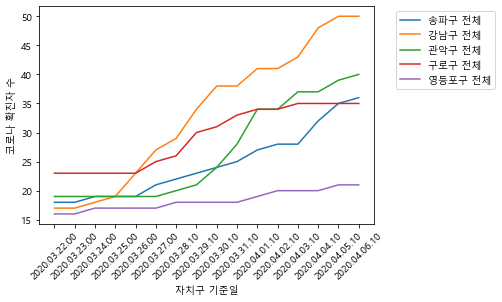

In [41]:
# 데이터프레임을 matplotlib로 그래프 표현
# ticks : x축의 '자치구 기준일'의 간격 조절 
# bbox_to_anchor : 그래프 외부에 legend() 설정
# rc함수 : 한글을 그래프로 표기하기 위해 한글 글꼴 설정
plt.rc('font', family='Malgun Gothic')
x = pd.date_range('2020.03.22.00','2020.04.07.00')
plt.plot(df5_200322_200407_final)
plt.xlabel('자치구 기준일')
plt.ylabel('코로나 확진자 수')
plt.xticks(rotation=45)
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.legend(['송파구 전체', '강남구 전체', '관악구 전체', '구로구 전체', '영등포구 전체'], bbox_to_anchor=(1.05,1.0), loc='upper left',fontsize=10)
plt.show()

In [42]:
# Graph Explanation ('2020.03.22.00','2020.04.07.00')
# '송파구 전체'   : 04.02 ~ 04.03에 급격한 그래프 기울기 증가
# '강남구 전체'   : 03.24 ~ 03.29, 04.02 ~ 04.03에 급격한 그래프 기울기 증가
# '관악구 전체'   : 03.28 ~ 03.31에 급격한 그래프 기울기 증가
# '구로구 전체'   : 03.27 ~ 03.28에 급격한 그래프 기울기 증가
# '영등포구 전체' : 그래프 기울기 변화폭이 가장 작음

# 04. 04에 시행된 고강도 사회적 거리두기로 인해 5개 지역에서 그래프 기울기가 확연히 감소했다. (효과가 있음)

#### 20.04.08.~ 20.04.19. : 첫 집합금지 명령
##### 04. 08 : 고강도 사회적 거리두기 (유흥업소에 집합금지 명령)

In [43]:
# 상위 5개 지역의 코로나 확진자 수 증감

In [44]:
df5_200408_200419 = df5_entire_final[df5_entire_final['자치구 기준일'].between('2020.04.08.00','2020.04.19.00')]
df5_200408_200419_final = df5_200408_200419.sort_values(by=df5_200408_200419.columns[0], ascending=True).set_index('자치구 기준일')
df5_200408_200419_final

,송파구 전체,강남구 전체,관악구 전체,구로구 전체,영등포구 전체
자치구 기준일,,,,,
2020.04.08.10,36,54,41,35,22
2020.04.09.10,36,56,41,35,23
2020.04.10.10,36,57,41,35,23
2020.04.11.10,36,59,41,35,23
2020.04.12.10,36,59,42,35,23
2020.04.13.10,37,59,42,35,23
2020.04.14.10,37,59,42,35,23
2020.04.15.10,37,59,42,35,23
2020.04.16.10,37,59,42,35,23


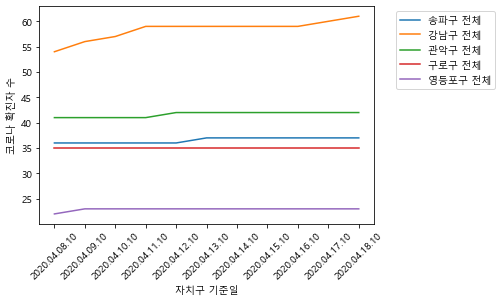

In [45]:
x = pd.date_range('2020.04.08.00','2020.04.19.00')
plt.plot(df5_200408_200419_final)
plt.xlabel('자치구 기준일')
plt.ylabel('코로나 확진자 수')
plt.xticks(rotation=45)
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.legend(['송파구 전체', '강남구 전체', '관악구 전체', '구로구 전체', '영등포구 전체'], bbox_to_anchor=(1.05,1.0), loc='upper left',fontsize=10)
plt.show()

In [46]:
# Graph Explanation
# '송파구 전체'   : 04.12에 그래프 기울기 매우 소극적 증가
# '강남구 전체'   : 04.08 ~ 04.10에 그래프 기울기 증가
# '관악구 전체'   : 04.11에 그래프 기울기 매우 소극적 증가
# '구로구 전체'   : 그래프 기울기 변함 없음
# '영등포구 전체' : 04.08에 그래프 기울기 매우 소극적 증가

# 04. 08에 코로나19 브리핑에서 서울시장에 따라 시행된 고강도 사회적 거리두기로 인해 
# '강남구'를 제외한 4개 지역에서는 그래프 기울기가 거의 일정한 모습을 보인다. (매우 효과가 있음)

#### 20.04.20.~ 20.05.05. : 일부 조치 완화
#####  04.20 ~ 05.05 : 16일간 기존보다 다소 완화된 형태로 사회적 거리 두기를 추진

In [47]:
# 상위 5개 지역의 코로나 확진자 수 증감

In [48]:
df5_200420_200505 = df5_entire_final[df5_entire_final['자치구 기준일'].between('2020.04.20.00','2020.05.05.00')]
df5_200420_200505_final = df5_200420_200505.sort_values(by=df5_200420_200505.columns[0], ascending=True).set_index('자치구 기준일')
df5_200420_200505_final

,송파구 전체,강남구 전체,관악구 전체,구로구 전체,영등포구 전체
자치구 기준일,,,,,
2020.04.20.10,37,62,42,35,23
2020.04.21.10,37,62,42,35,23
2020.04.22.10,37,62,42,35,23
2020.04.23.10,37,62,42,35,23
2020.04.24.10,37,62,42,35,23
2020.04.25.10,37,62,42,35,23
2020.04.26.10,37,62,42,35,23
2020.04.27.10,37,62,42,35,23
2020.04.28.10,37,64,43,35,23


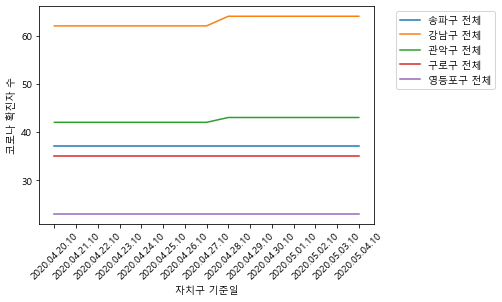

In [49]:
x = pd.date_range('2020.04.20.00','2020.05.05.00')
plt.plot(df5_200420_200505_final)
plt.xlabel('자치구 기준일')
plt.ylabel('코로나 확진자 수')
plt.xticks(rotation=45)
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.legend(['송파구 전체', '강남구 전체', '관악구 전체', '구로구 전체', '영등포구 전체'], bbox_to_anchor=(1.05,1.0), loc='upper left',fontsize=10)
plt.show()

In [50]:
# Graph Explanation
# '송파구 전체'   : 그래프 기울기 변함 없음
# '강남구 전체'   : 04.27에 그래프 기울기 소극적 증가
# '관악구 전체'   : 04.27에 그래프 기울기 소극적 증가
# '구로구 전체'   : 그래프 기울기 변함 없음
# '영등포구 전체' : 그래프 기울기 변함 없음

# 04.20 ~ 05.05, 16일간 기존보다 다소 완화된 형태로 사회적 거리 두기를 추진하여 4월 27일에 '강남구','관악구'에서 소극적 증가, 나머지 3지역은 거의 일정

#### 20.05.06.~ 20.06.27. : 생활 속 거리두기

In [51]:
# 상위 5개 지역의 코로나 확진자 수 증감

In [52]:
df5_200506_200627 = df5_entire_final[df5_entire_final['자치구 기준일'].between('2020.05.06.00','2020.06.27.00')]
df5_200506_200627_final = df5_200506_200627.sort_values(by=df5_200506_200627.columns[0], ascending=True).set_index('자치구 기준일')
df5_200506_200627_final

,송파구 전체,강남구 전체,관악구 전체,구로구 전체,영등포구 전체
자치구 기준일,,,,,
2020.05.06.10,37,64,43,35,23
2020.05.07.10,37,64,43,35,23
2020.05.08.10,37,64,43,35,23
2020.05.09.10,37,64,46,35,23
2020.05.10.10,38,65,47,35,23
2020.05.11.10,39,69,50,35,23
2020.05.12.10,39,69,51,35,23
2020.05.13.10,40,69,52,35,24
2020.05.14.10,41,69,52,35,24


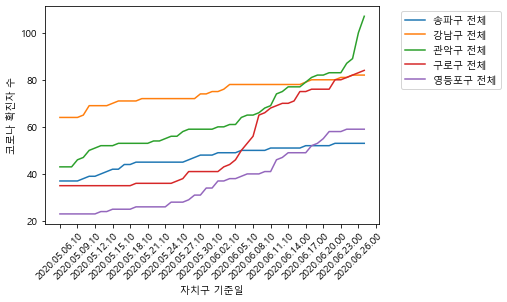

In [53]:
x = pd.date_range('2020.05.06.00','2020.06.27.00')
plt.plot(df5_200506_200627_final)
plt.xlabel('자치구 기준일')
plt.ylabel('코로나 확진자 수')
plt.xticks(rotation=45)
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
plt.legend(['송파구 전체', '강남구 전체', '관악구 전체', '구로구 전체', '영등포구 전체'], bbox_to_anchor=(1.05,1.0), loc='upper left',fontsize=10)
plt.show()

In [54]:
# Graph Explanation
# '송파구 전체'   : 전체적으로 그래프 기울기 소극적 증가
# '강남구 전체'   : 전체적으로 그래프 기울기 소극적 증가
# '관악구 전체'   : 06.23 ~ 06.26에 급격한 그래프 기울기 매우 증가
# '구로구 전체'   : 05.30 ~ 06.05에 급격한 그래프 기울기 매우 증가
# '영등포구 전체' : 06.08, 06.14 ~ 06.17에 그래프 기울기 증가 

# 생활 속 거리두기를 시행한 후 '관악구', '영등포구', '구로구'에서 그래프 기울기가 매우 크게 증가했다. (효과가 미미)

#### 20.06.28.~ 20.11.06  : 3단계화 -> 4단계로 세분화
###### 20.08.28 ~ : 강화된 사회적 거리두기 2단계(2,5단계 시행)
   ###### 1단계              : 50명 이하
   ###### 2단계              : 50~100명
   ###### 강화된 2단계  : 50~100명
   ###### 3단계              : 100명 이상이며 1주 2회 이상 2배로 증가 (사실상 봉쇄)

In [55]:
# 상위 5개 지역의 코로나 확진자 수 증감

In [56]:
df5_200628_201106 = df5_entire_final[df5_entire_final['자치구 기준일'].between('2020.06.28.00','2020.11.06.00')]
df5_200628_201106_final = df5_200628_201106.sort_values(by=df5_200628_201106.columns[0], ascending=True).set_index('자치구 기준일')
df5_200628_201106_final

,송파구 전체,강남구 전체,관악구 전체,구로구 전체,영등포구 전체
자치구 기준일,,,,,
2020.06.28.00,54,83,112,85,61
2020.06.29.00,55,83,113,86,61
2020.06.30.00,55,83,113,86,61
2020.07.01.00,55,83,117,86,63
2020.07.02.00,55,83,124,86,63
...,...,...,...,...,...
2020.11.02.00,405,359,475,205,208
2020.11.03.00,408,361,476,209,210
2020.11.04.00,414,363,477,210,212


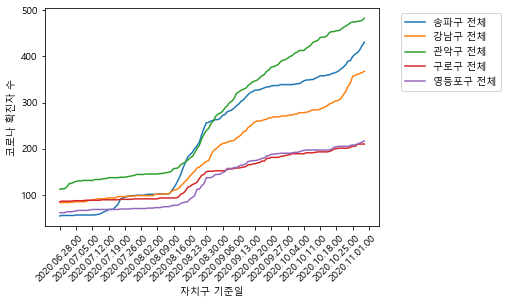

In [57]:
x = pd.date_range('2020.06.28.00','2020.11.06.00')
plt.plot(df5_200628_201106_final)
plt.xlabel('자치구 기준일')
plt.ylabel('코로나 확진자 수')
plt.xticks(rotation=45)
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))
plt.legend(['송파구 전체', '강남구 전체', '관악구 전체', '구로구 전체', '영등포구 전체'], bbox_to_anchor=(1.05,1.0), loc='upper left',fontsize=10)
plt.show()

In [58]:
# Graph Explanation
# '송파구 전체'   : 08.09 ~ 08.23에 그래프 기울기 매우 급격히 증가
# '강남구 전체'   : 08.09 ~ 09.23에 그래프 기울기 급격히 증가
# '관악구 전체'   : 08.16 이후에 그래프 기울기 매우 급격히 증가
# '구로구 전체'   : 08.09 ~ 08.23에 그래프 기울기 증가
# '영등포구 전체' : 08.16 ~ 08.23에 그래프 기울기 증가

# 강화된 사회적 거리두기 2단계를 시행했지만 2지역에서 매우 급격히 증가, 1지역에서 급격히 증가, 2지역에서 증가하는 그래프를 통해
# 의도대로 되지 않은 부실한 정책 (효과 매우 미미)

#### 20.11.07.~ 21.07.11  : 5단계화 (추가 조치)
###### 20.08.28 ~ : 강화된 사회적 거리두기 2단계(2,5단계 시행)
   ###### 1단계              : 100명 이하
   ###### 1.5단계           : 100명 초과
   ###### 2단계              : 1.5단계 기준 2배 이상 증가 / 2개 이상 권역 1.5단계 유행 지속
   ###### 2.5단계           : 전국 400~500명 이상 / 더블링 등 급격한 환자 증가
   ###### 3단계              : 전국 800~1,000명 이상 / 더블링 등 급격한 환자 증가

In [59]:
# 상위 5개 지역의 코로나 확진자 수 증감

In [60]:
df5_201107_210711 = df5_entire_final[df5_entire_final['자치구 기준일'].between('2020.11.07.00','2021.07.11.00')]
df5_201107_210711_final = df5_201107_210711.sort_values(by=df5_201107_210711.columns[0], ascending=True).set_index('자치구 기준일')
df5_201107_210711_final

,송파구 전체,강남구 전체,관악구 전체,구로구 전체,영등포구 전체
자치구 기준일,,,,,
2020.11.07.00,431,371,486,210,217
2020.11.08.00,433,374,486,210,223
2020.11.09.00,437,375,486,210,224
2020.11.10.00,439,377,488,210,224
2020.11.11.00,443,378,488,210,224
...,...,...,...,...,...
2021.07.07.00,3162,3528,2401,1700,2004
2021.07.08.00,3188,3587,2419,1717,2026
2021.07.09.00,3215,3631,2442,1734,2044


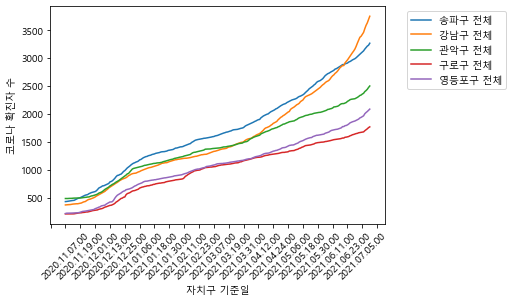

In [61]:
x = pd.date_range('2020.11.07.00','2021.07.11.00')
plt.plot(df5_201107_210711_final)
plt.xlabel('자치구 기준일')
plt.ylabel('코로나 확진자 수')
plt.xticks(rotation=45)
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(12))
plt.legend(['송파구 전체', '강남구 전체', '관악구 전체', '구로구 전체', '영등포구 전체'], bbox_to_anchor=(1.05,1.0), loc='upper left',fontsize=10)
plt.show()

In [62]:
# Graph Explanation
# 상위 5개 지역에서 그래프 기울기가 일정, 감소된 부분이 없이 전체적으로 급격히 증가하며
# '강남구'는 타 지역들에 비해 급격히 그래프가 상승하기도 함.

# 전에 3단계화 정책이 실패한 탓에 5단계로 세분화한 정책마저 효과가 매우 미미하다고 판단.

#### 21.07.01.~ 21.10.31  : 4단계화
###### (너무 세분화된 탓에 제대로 효과를 발휘하지 못함)
###### (1주 평균 인구 10만 명 당 확진자 수)
   ###### 1단계              : 수도권 250명 미만
   ###### 2단계              : 수도권 250명 이상
   ###### 3단계              : 수도권 500명 이상
   ###### 4단계              : 수도권 1000명 이상

In [63]:
# 상위 5개 지역의 코로나 확진자 수 증감

In [64]:
df5_210701_211031 = df5_entire_final[df5_entire_final['자치구 기준일'].between('2021.07.01.00','2021.10.31.00')]
df5_210701_211031_final = df5_210701_211031.sort_values(by=df5_210701_211031.columns[0], ascending=True).set_index('자치구 기준일')
df5_210701_211031_final

,송파구 전체,강남구 전체,관악구 전체,구로구 전체,영등포구 전체
자치구 기준일,,,,,
2021.07.01.00,3028,3269,2297,1653,1896
2021.07.02.00,3047,3320,2312,1663,1908
2021.07.03.00,3070,3373,2331,1667,1929
2021.07.04.00,3090,3392,2339,1670,1939
2021.07.05.00,3109,3426,2357,1675,1954
...,...,...,...,...,...
2021.10.27.00,7236,7791,6102,5597,5328
2021.10.28.00,7297,7840,6136,5650,5372
2021.10.29.00,7345,7861,6171,5701,5416


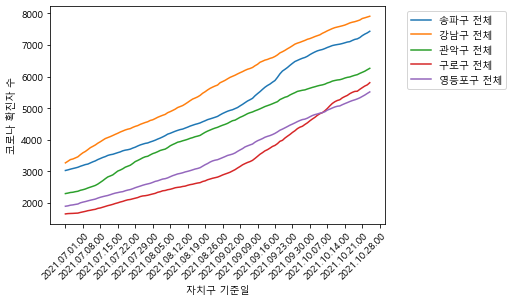

In [65]:
x = pd.date_range('2021.07.01.00','2021.10.31.00')
plt.plot(df5_210701_211031_final)
plt.xlabel('자치구 기준일')
plt.ylabel('코로나 확진자 수')
plt.xticks(rotation=45)
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))
plt.legend(['송파구 전체', '강남구 전체', '관악구 전체', '구로구 전체', '영등포구 전체'], bbox_to_anchor=(1.05,1.0), loc='upper left',fontsize=10)
plt.show()

In [66]:
# Graph Explanation
# '송파구 전체'   : 07.01 ~ 에서 직선 그래프가 나타남. 09.16 ~ 09.30에 그래프 기울기 급 증가
# '강남구 전체'   : 직선 그래프가 나타남
# '관악구 전체'   : 07.15 ~ 에 그래프 기울기 급 증가하며 유지
# '구로구 전체'   : 09.02 ~ 에 그래프 기울기 매우 급격히 증가하며 유지
# '영등포구 전체' : 직선 그래프가 나타남

# 전 그래프와 마찬가지로 5개 지역에서 직선 그래프를 나타낼 정도로 꾸준히 증가
# '송파구', '관악구'는 그래프 기울기가 붕 뜬 시기가 있음

# 전에 3단계화 정책이 실패한 탓에 5단계로 세분화한 정책마저 효과 매우 미미하다고 판단.

## Step 6. 종합 분석

In [73]:
# Graph Explanation ('2020.03.22.00','2020.04.07.00')
# ['송파구']

# '송파구 전체'   : 04.02 ~ 04.03에 급격한 그래프 기울기 증가
# '송파구 전체'   : 04.12에 그래프 기울기 매우 소극적 증가
# '송파구 전체'   : 그래프 기울기 변함 없음
# '송파구 전체'   : 전체적으로 그래프 기울기 소극적 증가
# '송파구 전체'   : 08.09 ~ 08.23에 그래프 기울기 매우 급격히 증가
#  상위 5개 지역에서 그래프 기울기가 일정, 감소된 부분이 없이 전체적으로 급격히 증가
# '송파구 전체'   : 07.01 ~ 에서 직선 그래프가 나타남. 09.16 ~ 09.30에 그래프 기울기 급 증가

# ['강남구']

# '강남구 전체'   : 03.24 ~ 03.29, 04.02 ~ 04.03에 급격한 그래프 기울기 증가
# '강남구 전체'   : 04.08 ~ 04.10에 그래프 기울기 증가
# '강남구 전체'   : 04.27에 그래프 기울기 소극적 증가
# '강남구 전체'   : 전체적으로 그래프 기울기 소극적 증가
# '강남구 전체'   : 08.09 ~ 09.23에 그래프 기울기 급격히 증가
# '강남구'는 타 지역들에 비해 급격히 그래프가 상승
# '강남구 전체'   : 직선 그래프가 나타남

# ['관악구']

# '관악구 전체'   : 03.28 ~ 03.31에 급격한 그래프 기울기 증가
# '관악구 전체'   : 04.11에 그래프 기울기 매우 소극적 증가
# '관악구 전체'   : 04.27에 그래프 기울기 소극적 증가
# '관악구 전체'   : 06.23 ~ 06.26에 급격한 그래프 기울기 매우 증가
# '관악구 전체'   : 07.15 ~ 에 그래프 기울기 급 증가하며 유지
# '관악구 전체'   : 08.16 이후에 그래프 기울기 매우 급격히 증가
# '관악구 전체'   : 07.15 ~ 에 그래프 기울기 급 증가하며 유지

# ['구로구']

# '구로구 전체'   : 03.27 ~ 03.28에 급격한 그래프 기울기 증가
# '구로구 전체'   : 그래프 기울기 변함 없음
# '구로구 전체'   : 그래프 기울기 변함 없음
# '구로구 전체'   : 05.30 ~ 06.05에 급격한 그래프 기울기 매우 증가
# '구로구 전체'   : 08.09 ~ 08.23에 그래프 기울기 증가
# '구로구 전체'   : 09.02 ~ 에 그래프 기울기 매우 급격히 증가하며 유지

# ['영등포구']

# '영등포구 전체' : 그래프 기울기 변화폭이 가장 작음
# '영등포구 전체' : 04.08에 그래프 기울기 매우 소극적 증가
# '영등포구 전체' : 그래프 기울기 변함 없음
# '영등포구 전체' : 06.08, 06.14 ~ 06.17에 그래프 기울기 증가 
# '영등포구 전체' : 08.16 ~ 08.23에 그래프 기울기 증가
# '영등포구 전체' : 직선 그래프가 나타남

# [서울시 거리두기 정책 효과]
#1. 20.03.22.~ 20.04.07. : 강화된 거리두기 - 효과 있음(5개 지역에서 그래프 기울기가 확연히 감소)
#2. 20.04.08.~ 20.04.19. : 첫 집합금지 명령 - 매우 효과가 있음('강남구 제외')
#3. 20.04.20.~ 20.05.05. : 일부 조치 완화 - 효과 보통(04.27에 '강남구','관악구'에서 소극적 증가, 나머지 3지역은 거의 일정)
#4. 20.05.06.~ 20.06.27. : 생활 속 거리두기 - 효과 미미('관악구', '영등포구', '구로구'에서 그래프 기울기가 매우 크게 증가) 
#5. 20.06.28.~ 20.11.06  : 3단계화 - 효과 매우 미미(의도대로 되지 않은 부실한 정책 / 2지역 : 매우 급격히 증가, 1지역 : 급격히 증가, 2지역 : 증가)
#6. 20.11.07.~ 21.07.11  : 5단계화 - 효과 매우 미미(전체적으로 급격히 증가 / '강남구'는 급격히 그래프가 상승)
#7. 21.07.01.~ 21.10.31  : 4단계화 - 효과 매우 미미(직선 그래프를 나타낼 정도로 꾸준히 증가 / 송파구', '관악구'는 그래프 기울기가 붕 뜸)